<img src="RP.png" align="right" width="400px"/>

# Riemann Problem

A Riemann problem is a $\textit{conservation law}$ together with piecewise, constant data with a single discontinuity. 

You can solve it in many ways, using the exact solvers or the approximated ones. 

<br clear="right"/>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit.simdir import SimDir
from kuibit.grid_data import UniformGrid

%matplotlib inline
%config InlineBackend.figure_format='retina'
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=12, usetex=False)

/opt/anaconda3/lib/python3.9/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


# Sod Shock Tube Problem

The Sod Shock Tube Problem is a physical scenario commonly used to model a one-dimensional Riemann problem; it serves as an illustrative example to evaluate the accuracy of numerical simulation codes. The physical tube, approximated as one-dimensional, is initially divided into two distinct regions, each characterized by different pressure ($P_i$), velocity along the $x$-axis ($v_{i,x}$), and density ($\rho_{i}$) parameters.

<img src="Sod-shock_sketch.png" align="center" width="500px"/>

## Exact Solution

In this section we extract the solution using the exact, theoretical one. 

In [2]:
#initial data from the Exact Riemann solver of https://www.brunogiacomazzo.org/?page_id=395
exact = np.loadtxt("Sod_exact.dat")

In [3]:
x_exact=exact[:,0]
rho_exact=exact[:,1]
press_exact=exact[:,2] #note: this is pgas+pmag
vx_exact=exact[:,3]
vy_exact=exact[:,4]
vz_exact=exact[:,5]
By_exact=exact[:,6]
Bz_exact=exact[:,7]

### Density

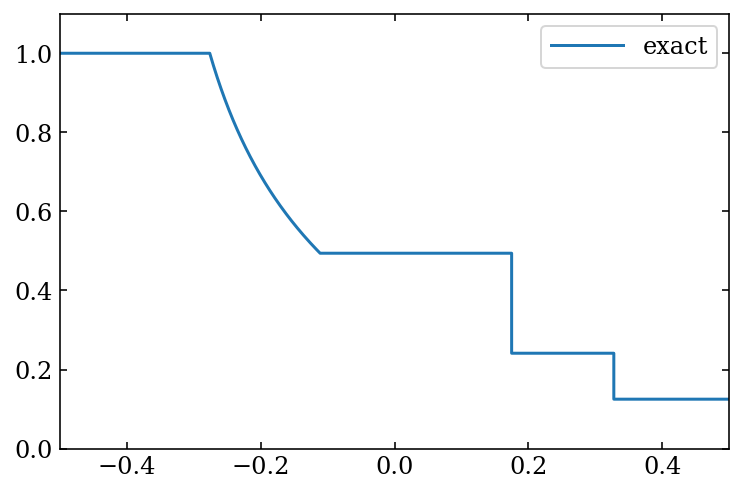

In [50]:
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.ylim(-0.0, 1.1)
plt.legend()
plt.show()

### Pressure

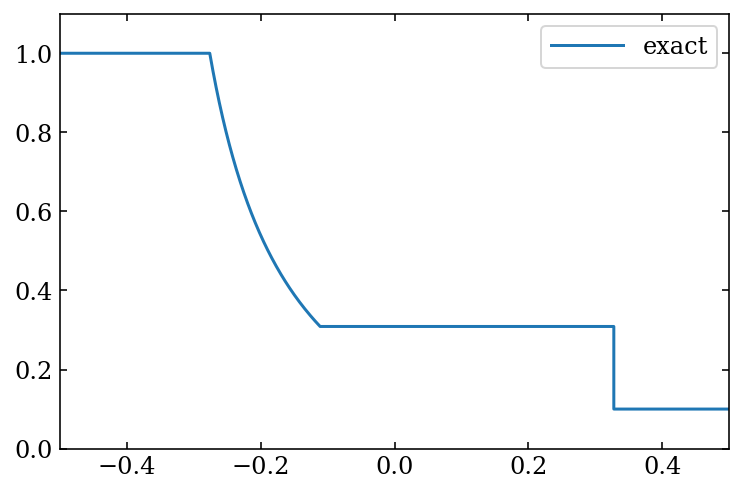

In [52]:
plt.plot(x_exact, press_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.ylim(-0.0, 1.1)
plt.legend()
plt.show()

### Velocity

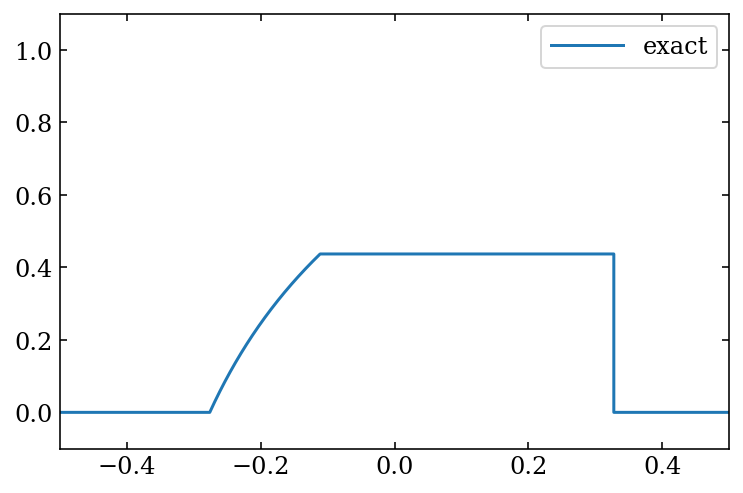

In [54]:
plt.plot(x_exact, vx_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

## Read the numerical results

In [31]:
gf= SimDir("Sod_1d_400/").gf
gf_1= SimDir("Sod_1d_40/").gf
gf_2= SimDir("Sod_1d_4/").gf
#print(gf)

In [32]:
vars1d=gf.x
vars1d_1=gf_1.x
vars1d_2=gf_2.x

#print(vars1d)
#vars1d.fields?

In [94]:
#density
rho=vars1d.fields.rho
rho_1=vars1d_1.fields.rho
rho_2=vars1d_2.fields.rho
#pressure
press=vars1d.fields.press
press_1=vars1d_1.fields.press
press_2=vars1d_2.fields.press
#velocity
v=vars1d.fields.vel[0]
v_1=vars1d_1.fields.vel[0]
v_2=vars1d_2.fields.vel[0]

In [95]:
print(len(rho.iterations))
print(len(v_1.iterations))
print(len(press.iterations))

21
11
21


## Kuibit Standard Methods for Plots

We create a uniform grid and plot the data on it. Kuibit indeed assumes that data were produced on a grid with several meshes (AMR). In our case the grid was already uniform, so later we will see an alternative way to plot the data without interpolating them on a new grid.

In [96]:
small_grid = UniformGrid([101], x0=[-0.45], x1=[0.45])
small_grid_1 = UniformGrid([101], x0=[-0.35], x1=[0.35])

In [97]:
print(rho.iterations)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [98]:
#density
rho_final = rho.read_on_grid(200, small_grid)
rho_final_1 = rho_1.read_on_grid(100, small_grid)
rho_final_2 = rho_2.read_on_grid(100, small_grid_1)
#pressure
press_final = press.read_on_grid(200, small_grid)
press_final_1 = press_1.read_on_grid(100, small_grid)
press_final_2 = press_2.read_on_grid(100, small_grid_1)
#velocity
v_final = v.read_on_grid(200, small_grid)
v_final_1 = v_1.read_on_grid(100, small_grid)
v_final_2 = v_2.read_on_grid(100, small_grid_1)

In [99]:
#print(*rho_final.coordinates_meshgrid())

## Plotting the results and comparing with the exact solution

### Density

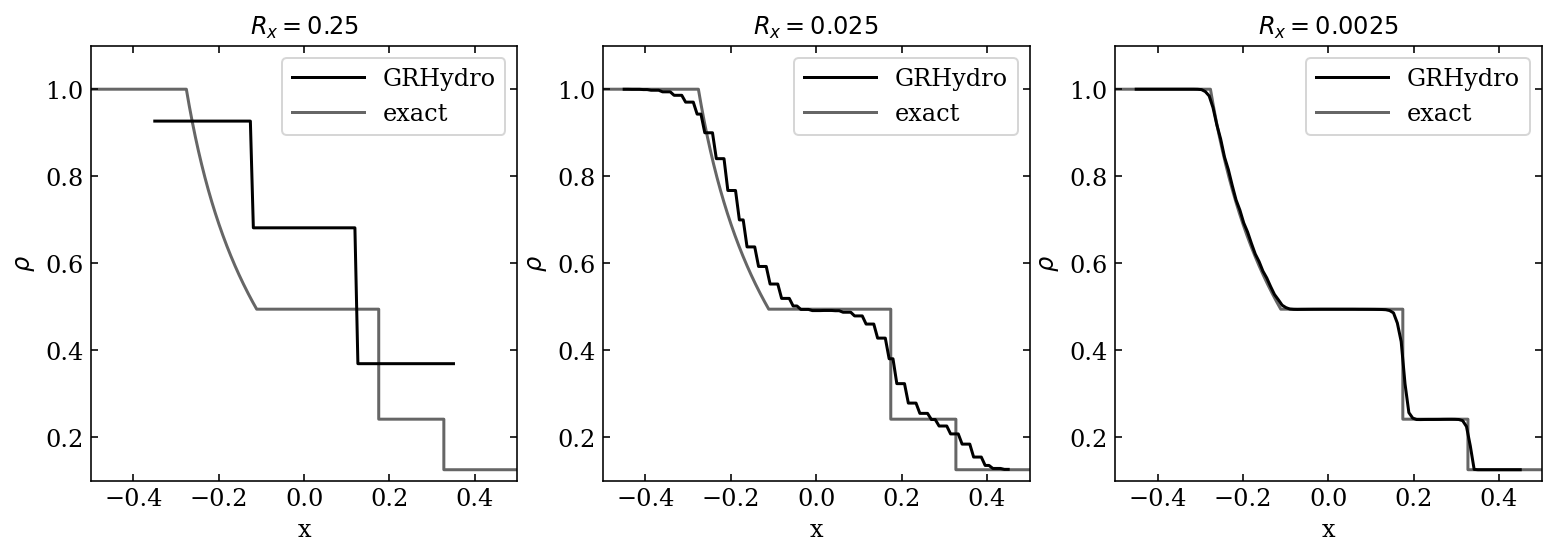

In [100]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 4))

ax1.plot(*rho_final_2.coordinates_meshgrid(), rho_final_2.data_xyz, label="GRHydro", c='black')
ax1.plot(x_exact, rho_exact, label="exact", c='black', alpha=0.6)
ax1.set_xlim(-0.5, 0.5)
ax1.set_ylim(0.1, 1.1)
ax1.set_xlabel('x')
ax1.set_ylabel(r"$\rho$")
ax1.legend()
ax1.set_title(r'$R_x = 0.25$')

ax2.plot(*rho_final_1.coordinates_meshgrid(), rho_final_1.data_xyz, label="GRHydro", c='black')
ax2.plot(x_exact, rho_exact, label="exact", c='black', alpha=0.6)
ax2.set_xlim(-0.5, 0.5)
ax2.set_ylim(0.1, 1.1)
ax2.set_xlabel('x')
ax2.set_ylabel(r"$\rho$")
ax2.legend()
ax2.set_title(r'$R_x = 0.025$')

ax3.plot(*rho_final.coordinates_meshgrid(), rho_final.data_xyz, label="GRHydro", c='black')
ax3.plot(x_exact, rho_exact, label="exact", c='black', alpha=0.6)
ax3.set_xlim(-0.5, 0.5)
ax3.set_ylim(0.1, 1.1)
ax3.set_xlabel('x')
ax3.set_ylabel(r"$\rho$")
ax3.legend()
ax3.set_title(r'$R_x = 0.0025$')

plt.savefig("./images/SOD_rho.png")
plt.show()

### Pressure

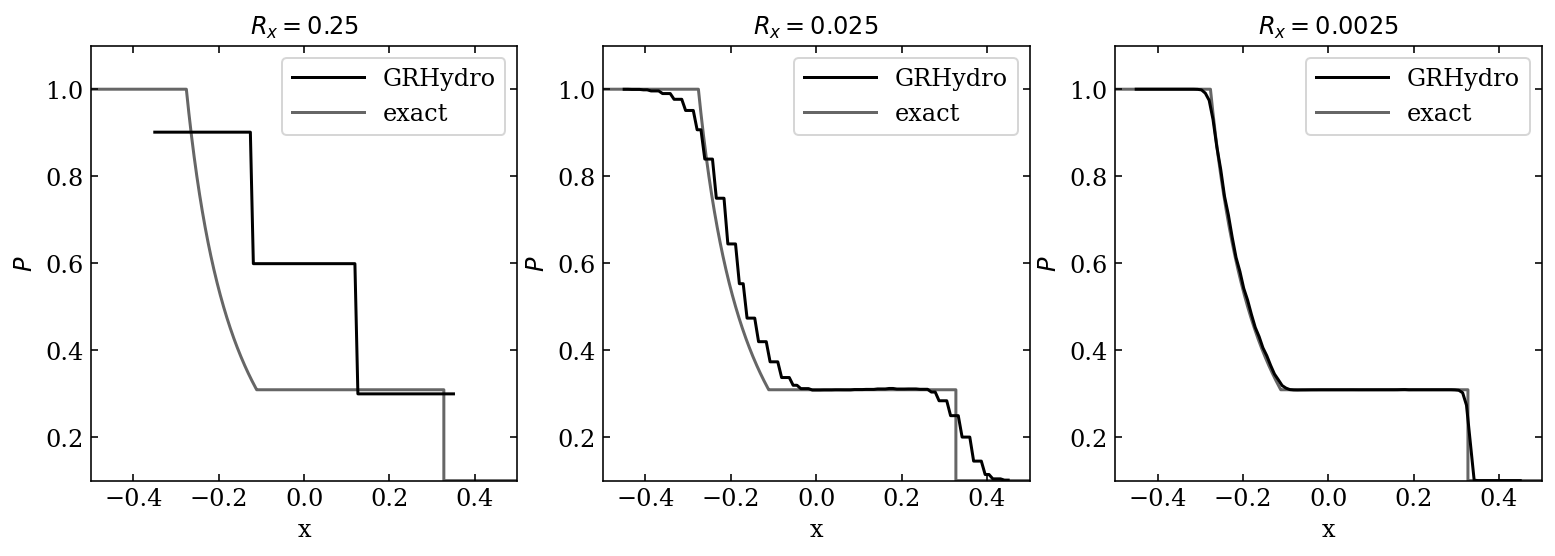

In [101]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 4))

ax1.plot(*press_final_2.coordinates_meshgrid(), press_final_2.data_xyz, label="GRHydro", c='black')
ax1.plot(x_exact, press_exact, label="exact", c='black', alpha=0.6)
ax1.set_xlim(-0.5, 0.5)
ax1.set_ylim(0.1, 1.1)
ax1.set_xlabel('x')
ax1.set_ylabel(r"$P$")
ax1.legend()
ax1.set_title(r'$R_x = 0.25$')

ax2.plot(*press_final_1.coordinates_meshgrid(), press_final_1.data_xyz, label="GRHydro", c='black')
ax2.plot(x_exact, press_exact, label="exact", c='black', alpha=0.6)
ax2.set_xlim(-0.5, 0.5)
ax2.set_ylim(0.1, 1.1)
ax2.set_xlabel('x')
ax2.set_ylabel(r"$P$")
ax2.legend()
ax2.set_title(r'$R_x = 0.025$')

ax3.plot(*press_final.coordinates_meshgrid(), press_final.data_xyz, label="GRHydro", c='black')
ax3.plot(x_exact, press_exact, label="exact", c='black', alpha=0.6)
ax3.set_xlim(-0.5, 0.5)
ax3.set_ylim(0.1, 1.1)
ax3.set_xlabel('x')
ax3.set_ylabel(r"$P$")
ax3.legend()
ax3.set_title(r'$R_x = 0.0025$')

plt.savefig("./images/SOD_press.png")
plt.show()

### Velocity

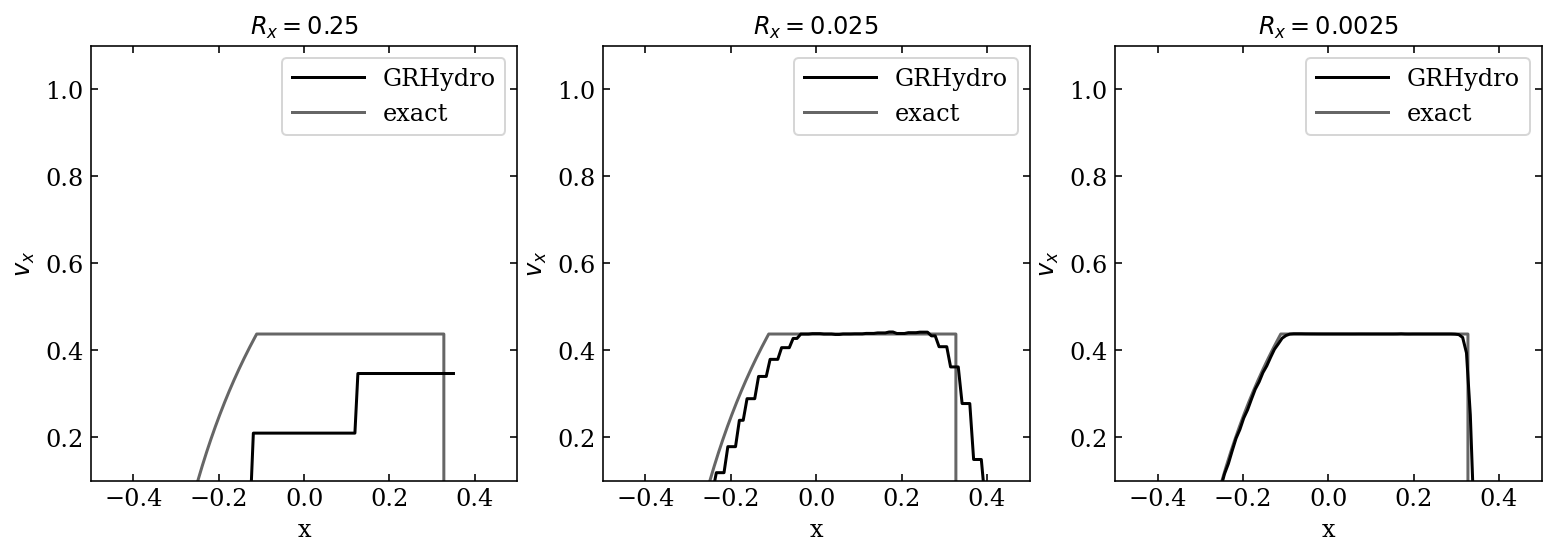

In [102]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 4))

ax1.plot(*v_final_2.coordinates_meshgrid(), v_final_2.data_xyz, label="GRHydro", c='black')
ax1.plot(x_exact, vx_exact, label="exact", c='black', alpha=0.6)
ax1.set_xlim(-0.5, 0.5)
ax1.set_ylim(0.1, 1.1)
ax1.set_xlabel('x')
ax1.set_ylabel(r"$v_x$")
ax1.legend()
ax1.set_title(r'$R_x = 0.25$')

ax2.plot(*v_final_1.coordinates_meshgrid(), v_final_1.data_xyz, label="GRHydro", c='black')
ax2.plot(x_exact, vx_exact, label="exact", c='black', alpha=0.6)
ax2.set_xlim(-0.5, 0.5)
ax2.set_ylim(0.1, 1.1)
ax2.set_xlabel('x')
ax2.set_ylabel(r"$v_x$")
ax2.legend()
ax2.set_title(r'$R_x = 0.025$')

ax3.plot(*v_final.coordinates_meshgrid(), v_final.data_xyz, label="GRHydro", c='black')
ax3.plot(x_exact, vx_exact, label="exact", c='black', alpha=0.6)
ax3.set_xlim(-0.5, 0.5)
ax3.set_ylim(0.1, 1.1)
ax3.set_xlabel('x')
ax3.set_ylabel(r"$v_x$")
ax3.legend()
ax3.set_title(r'$R_x = 0.0025$')

plt.savefig("./images/SOD_vx.png")
plt.show()

## Alternative Method
This method can only be used with simulations that used only one refinement level (i.e., a uniform grid) and using only 1 MPI process.

In [25]:
#[iterazione][refinement level][component number]
rho[0][0][0].data

array([1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   ,

In [26]:
rho[0][0][0].coordinates()[0].data

array([-0.4975, -0.495 , -0.4925, -0.49  , -0.4875, -0.485 , -0.4825,
       -0.48  , -0.4775, -0.475 , -0.4725, -0.47  , -0.4675, -0.465 ,
       -0.4625, -0.46  , -0.4575, -0.455 , -0.4525, -0.45  , -0.4475,
       -0.445 , -0.4425, -0.44  , -0.4375, -0.435 , -0.4325, -0.43  ,
       -0.4275, -0.425 , -0.4225, -0.42  , -0.4175, -0.415 , -0.4125,
       -0.41  , -0.4075, -0.405 , -0.4025, -0.4   , -0.3975, -0.395 ,
       -0.3925, -0.39  , -0.3875, -0.385 , -0.3825, -0.38  , -0.3775,
       -0.375 , -0.3725, -0.37  , -0.3675, -0.365 , -0.3625, -0.36  ,
       -0.3575, -0.355 , -0.3525, -0.35  , -0.3475, -0.345 , -0.3425,
       -0.34  , -0.3375, -0.335 , -0.3325, -0.33  , -0.3275, -0.325 ,
       -0.3225, -0.32  , -0.3175, -0.315 , -0.3125, -0.31  , -0.3075,
       -0.305 , -0.3025, -0.3   , -0.2975, -0.295 , -0.2925, -0.29  ,
       -0.2875, -0.285 , -0.2825, -0.28  , -0.2775, -0.275 , -0.2725,
       -0.27  , -0.2675, -0.265 , -0.2625, -0.26  , -0.2575, -0.255 ,
       -0.2525, -0.2

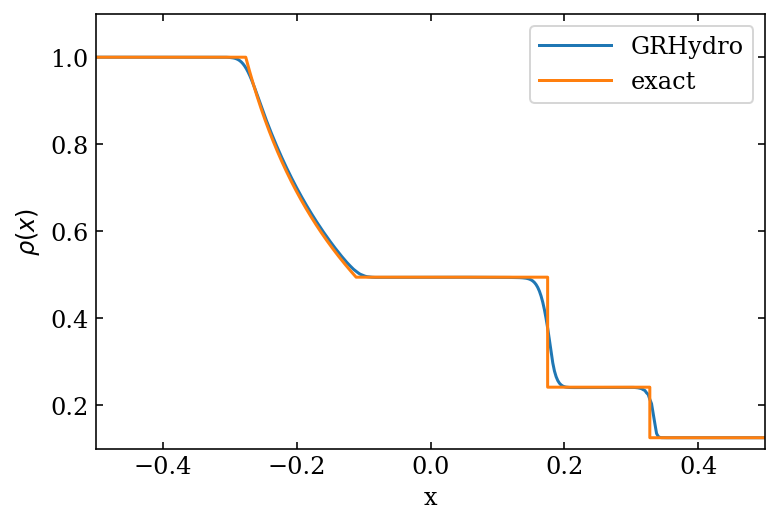

In [28]:
plt.plot(rho[200][0][0].coordinates()[0].data,rho[200][0][0].data, label="GRHydro")
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.ylim(0.1, 1.1)
plt.xlabel('x')
plt.ylabel(r'$\rho(x)$')
plt.legend()
plt.savefig("./images/SOD_rho_2.png")
plt.show()